# EDA

In [17]:
# importing the dataset
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#reading the data
data = pd.read_csv("../data/data_set_for_visualization.csv")

In [15]:
# observing the first few rows
data.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [44]:
# summary statistics of the data
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [51]:
# unique number of airbnb owners
print("Unique number of AirBNB owners :",len(data["host_id"].unique()))
print("Unique number of neighborhoods :",len(data["neighbourhood_group"].unique()))

Unique number of AirBNB owners : 37457
Unique number of neighborhoods : 5


Observations:

    - There are 48895 different airbnbs listed in the dataset.
    - There are 37457 different airbnb owners in the dataset.

### Univariate Analysis

In [26]:
# AirBNB's per user
house_per_user = data.groupby("host_id").aggregate(num_of_houses=('id','count'))
house_per_user.reset_index(inplace=True)
grouped_house_user_count = house_per_user.groupby("num_of_houses").aggregate(num_of_users=('host_id','count'))
grouped_house_user_count.reset_index(inplace=True)

<ipython-input-50-45e8937cd1e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visualize_grouped_house_user_count["percentage"] = visualize_grouped_house_user_count["num_of_users"]/37457


,num_of_houses,num_of_users,percentage
0,1,32303,0.862402
1,2,3329,0.088875
2,3,951,0.025389
3,4,360,0.009611
4,5,169,0.004512
5,6,95,0.002536
6,7,57,0.001522
7,8,52,0.001388
8,9,26,0.000694
9,10,21,0.000561


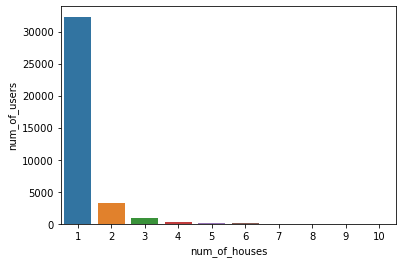

In [50]:
# create bar chart to visualize the distribution
visualize_grouped_house_user_count = grouped_house_user_count.head(10)
visualize_grouped_house_user_count["percentage"] = visualize_grouped_house_user_count["num_of_users"]/37457
sns.barplot(data=visualize_grouped_house_user_count, x='num_of_houses', y='num_of_users')
visualize_grouped_house_user_count.head(10)

Observations:

    - ~86% of the owners have only 1 airbnb.
    - ~9% of the owners have 2 airbnb's.
    - ~2.5% of the owners have 3 airbnb's.

In [58]:
# AirBNB's in each neighborhood
house_per_neighborhood = data.groupby("neighbourhood_group").aggregate(num_of_houses=('id','count'))
house_per_neighborhood.reset_index(inplace=True)
house_per_neighborhood["percentage"] = house_per_neighborhood["num_of_houses"]/48895

,neighbourhood_group,num_of_houses,percentage
0,Bronx,1091,0.022313
1,Brooklyn,20104,0.411167
2,Manhattan,21661,0.443011
3,Queens,5666,0.115881
4,Staten Island,373,0.007629


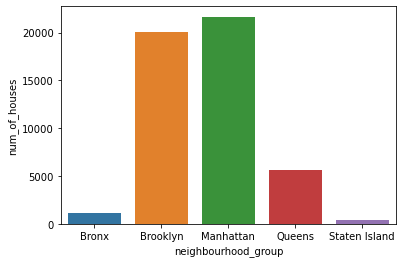

In [60]:
# neighborhood wise distribution of the airbnbs
sns.barplot(data=house_per_neighborhood, x='neighbourhood_group', y='num_of_houses')
house_per_neighborhood.head()